<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #3498db;
            background-color:#1e272e;
            overflow:hidden;
            font-weight:700;
            text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.6);">
   <b>Importing Libraries</b>
</div>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,RobustScaler,PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier,VotingClassifier,StackingClassifier

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest,chi2,f_classif

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report,roc_curve, roc_auc_score

import pickle as pkl

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #4CAF50;
            background: linear-gradient(45deg, #1E1E1E, #4CAF50);
            overflow:hidden;
            font-weight:400">
   <b>DataSet and Overview</b>
</div>

In [8]:
df=pd.read_csv("mental_health_social_media_dataset.csv")

df.head(10)

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed
5,Myra Kale,25,2/8/2024,Female,Snapchat,516,284,1,3,6.4,8,3,8,5,Stressed
6,Ananya Kulkarni,29,2/19/2024,Other,Snapchat,328,180,1,2,7.4,27,3,7,6,Stressed
7,Meera Das,28,1/11/2024,Female,Facebook,394,138,1,1,7.0,21,2,7,6,Stressed
8,Vihaan Naidu,31,1/22/2024,Male,Facebook,326,114,0,1,7.4,27,2,6,6,Stressed
9,Meera Patil,26,2/2/2024,Female,Facebook,339,119,0,1,7.3,26,2,6,6,Stressed


In [9]:
df.columns

Index(['person_name', 'age', 'date', 'gender', 'platform',
       'daily_screen_time_min', 'social_media_time_min',
       'negative_interactions_count', 'positive_interactions_count',
       'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level',
       'mood_level', 'mental_state'],
      dtype='object')

In [10]:
print(df.shape)
print(70*'#')
df.info()

(5000, 15)
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  

<div style="
    padding:14px;
    margin:12px 0;
    font-size:150%;
    color:#ffffff;
    border-radius:10px;
    background: linear-gradient(90deg, #00F260, #0575E6);
    box-shadow: 0 0 15px rgba(0,242,96,0.6);
    text-align:center;
    font-weight:600;
    letter-spacing:1px;">
   📊 Descriptive Statictics
</div>


In [11]:
df.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
age,5000.0,29.94780,12.279936,13.0,21.0,27.0,35.25,69.0
daily_screen_time_min,5000.0,373.05820,106.003916,140.0,310.0,388.0,461.00,520.0
social_media_time_min,5000.0,175.33160,71.209329,35.0,118.0,170.0,231.00,338.0
negative_interactions_count,5000.0,0.86420,0.555176,0.0,1.0,1.0,1.00,2.0
positive_interactions_count,5000.0,1.83540,0.943443,0.0,1.0,2.0,2.00,4.0
sleep_hours,5000.0,7.13466,0.533184,6.4,6.7,7.1,7.45,8.3
physical_activity_min,5000.0,22.69340,10.602862,8.0,14.0,21.0,29.00,46.0
anxiety_level,5000.0,2.51040,0.794996,1.0,2.0,3.0,3.00,4.0
stress_level,5000.0,7.10760,1.062378,5.0,6.0,7.0,8.00,9.0
mood_level,5000.0,5.62580,0.759928,4.0,5.0,6.0,6.00,7.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
person_name,5000,891,Navya Chauhan,14
date,5000,686,10/30/2025,12
gender,5000,3,Female,2474
platform,5000,7,Facebook,744
mental_state,5000,3,Stressed,4601


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #3498db;
            background-color:#1e272e;
            overflow:hidden;
            font-weight:700;
            text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.6);">
   <b>Null Cheching</b>
</div>

In [13]:
df.isnull().sum()

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

<div style="
    padding:14px;
    margin:12px 0;
    background: rgba(255,255,255,0.1);
    backdrop-filter: blur(8px);
    color:#ffffff;
    border-radius:10px;
    border:1px solid rgba(255,255,255,0.2);
    box-shadow: 0 8px 32px rgba(0,0,0,0.37);">
    Duplicatr Checking
</div>


In [14]:
df.duplicated().sum()

0

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #4CAF50;
            background: linear-gradient(45deg, #1E1E1E, #4CAF50);
            overflow:hidden;
            font-weight:400">
   <b>IQR_Outliers</b>
</div>

In [15]:
def detect_outliers(data):
    num_data = data.select_dtypes(include='number')  # numerical only
    
    Q1 = num_data.quantile(0.25)
    Q3 = num_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (num_data < lower_bound) | (num_data > upper_bound)
outliers = detect_outliers(df.drop('mental_state', axis=1))
outliers.sum()




age                             281
daily_screen_time_min             0
social_media_time_min             0
negative_interactions_count    1633
positive_interactions_count     265
sleep_hours                       0
physical_activity_min             0
anxiety_level                     0
stress_level                      0
mood_level                        0
dtype: int64

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #3498db;
            background-color:#1e272e;
            overflow:hidden;
            font-weight:700;
            text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.6);">
   <b>Showing_Unique values</b>
</div>

In [16]:
def column_info(data):
    cols=[]
    col_uniques=[]
    col_numberofuniques=[]
    dtype=[]
    for col in data.columns:
        cols.append(col)
        dtype.append(data[col].dtype.name)
        col_uniques.append(data[col].unique())
        col_numberofuniques.append(data[col].nunique())
    return pd.DataFrame({'name':cols,'data type':dtype,'unique_Values':col_uniques,'no_unique':col_numberofuniques})
column_info(df)


,name,data type,unique_Values,no_unique
0,person_name,object,"[Reyansh Ghosh, Neha Patel, Ananya Naidu, Neha...",891
1,age,int64,"[35, 24, 26, 66, 31, 25, 29, 28, 39, 33, 30, 4...",57
2,date,object,"[1/1/2024, 1/12/2024, 1/6/2024, 1/17/2024, 1/2...",686
3,gender,object,"[Male, Female, Other]",3
4,platform,object,"[Instagram, Snapchat, Facebook, WhatsApp, TikT...",7
5,daily_screen_time_min,int64,"[320, 453, 357, 190, 383, 516, 328, 394, 326, ...",342
6,social_media_time_min,int64,"[160, 226, 196, 105, 211, 284, 180, 138, 114, ...",304
7,negative_interactions_count,int64,"[1, 0, 2]",3
8,positive_interactions_count,int64,"[2, 3, 1, 4, 0]",5
9,sleep_hours,float64,"[7.4, 6.7, 7.2, 8.0, 7.1, 6.4, 7.0, 7.3, 7.8, ...",19


In [17]:
print(df['gender'].value_counts())

df = df.drop(df[df['gender'] == 'Other'].index)


gender
Female    2474
Male      2427
Other       99
Name: count, dtype: int64


In [18]:
df.gender.value_counts()

gender
Female    2474
Male      2427
Name: count, dtype: int64

<div style="
    padding:14px;
    margin:12px 0;
    font-size:150%;
    color:#ffffff;
    border-radius:10px;
    background: linear-gradient(90deg, #00F260, #0575E6);
    box-shadow: 0 0 15px rgba(0,242,96,0.6);
    text-align:center;
    font-weight:600;
    letter-spacing:1px;">
   📈  EDA and Vizualizations
</div>


# Histogram

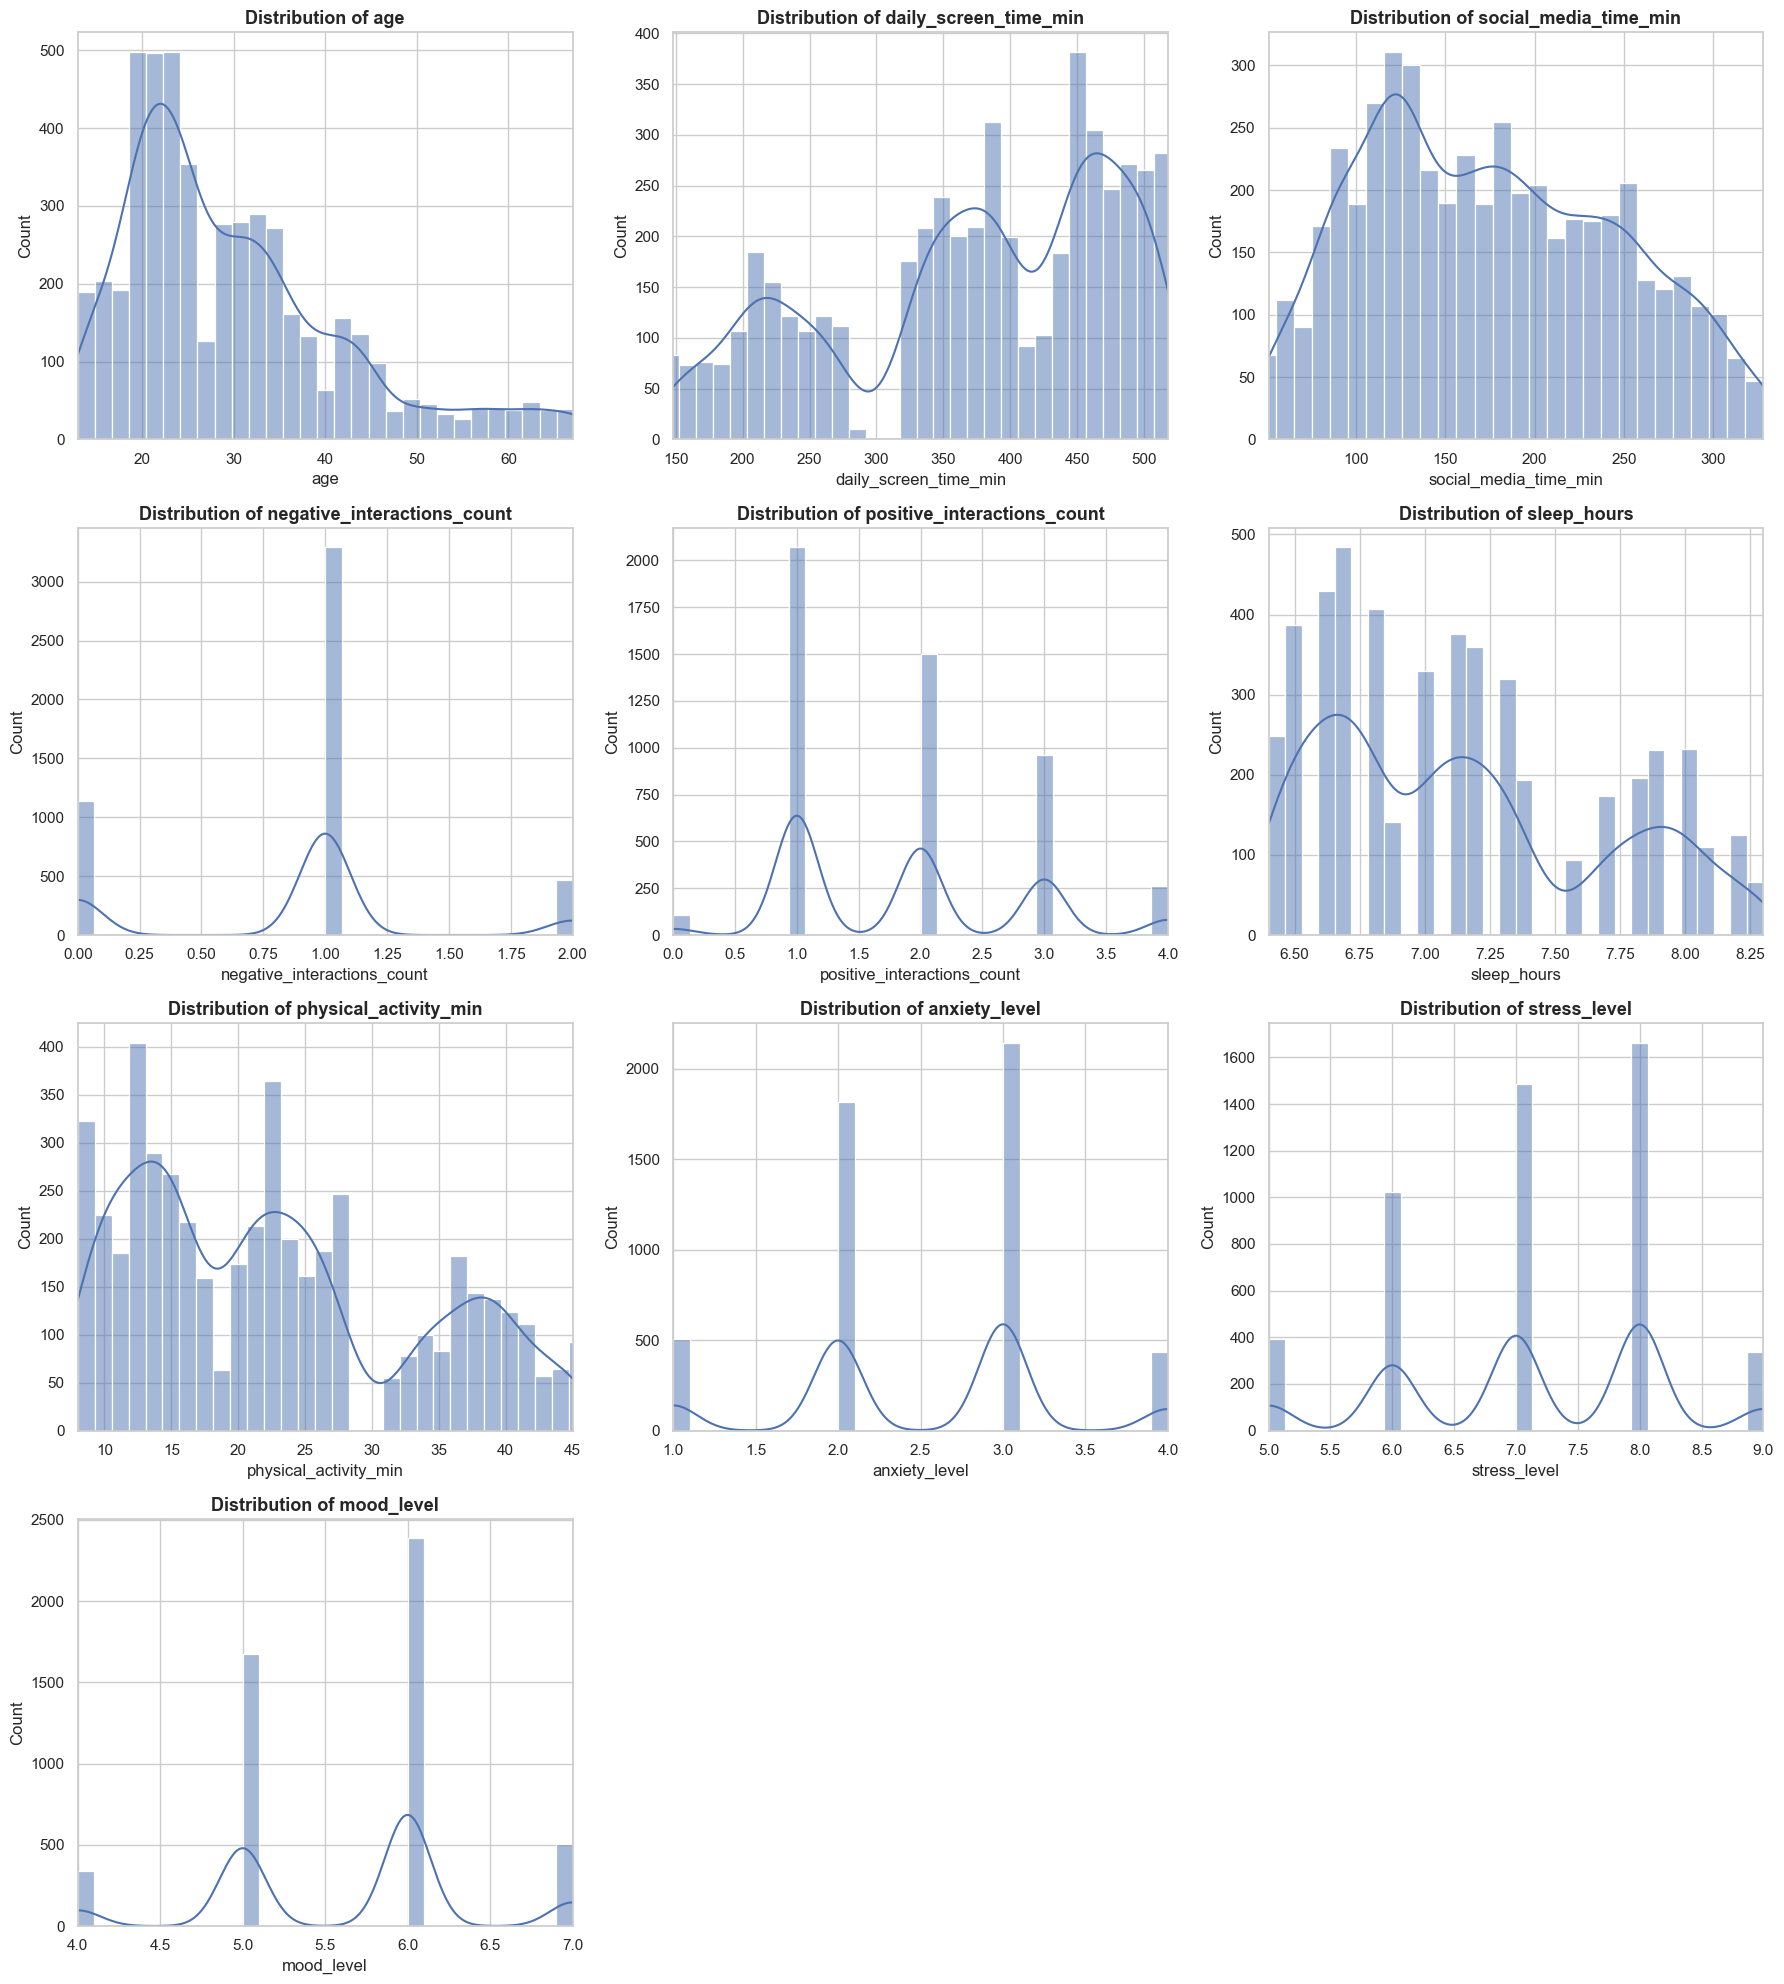

In [19]:


sns.set_theme(style="whitegrid")

num_df = df.select_dtypes(include=np.number)

n_cols = 3
n_rows = int(np.ceil(len(num_df.columns) / n_cols))

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(num_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(
        data=num_df,
        x=col,
        bins=30,
        kde=True
    )
    
    plt.xlim(
        num_df[col].quantile(0.01),
        num_df[col].quantile(0.99)
    )
    
    plt.title(f"Distribution of {col}", fontsize=13, fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Countplot for categorical columns

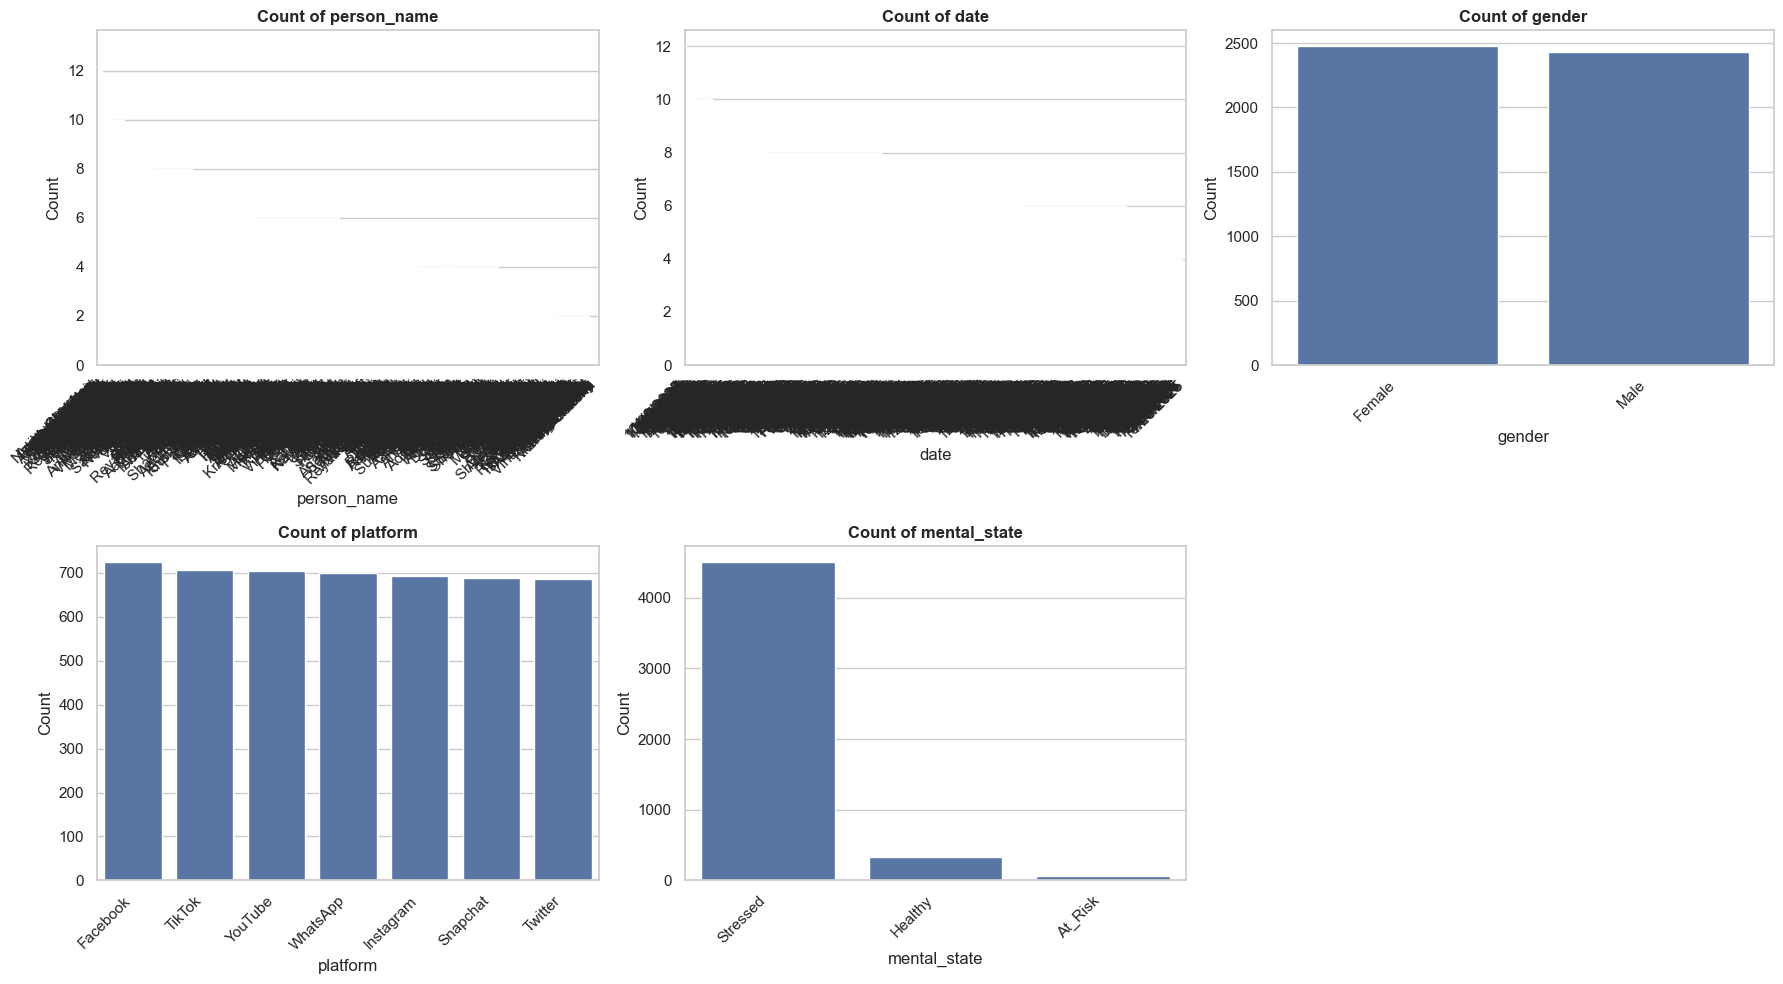

In [20]:
# categorica_columns_plotting
cat_df = df.select_dtypes(include=['object', 'category'])

if cat_df.shape[1] == 0:
    print("No categorical columns found.")
else:
    n_cols = 3
    n_rows = int(np.ceil(len(cat_df.columns) / n_cols))

    plt.figure(figsize=(18, 5 * n_rows))

    for i, col in enumerate(cat_df.columns, 1):
        plt.subplot(n_rows, n_cols, i)

        sns.countplot(
            x=col,
            data=df,
            order=df[col].value_counts().index
        )

        plt.title(f"Count of {col}", fontsize=12, weight="bold")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()


<div style="
    padding:14px;
    margin:12px 0;
    background:#FAFAFA;
    color:#333333;
    border-radius:12px;
    box-shadow: 0 6px 18px rgba(30, 207, 77, 0.15);
    font-size:115%;">
    
⚠️ Handling Data and Preprocessing
</div>


In [21]:
#person_name column is not useful for analysis
df.drop(columns=['person_name'], inplace=True)
#date column is not useful for analysis
df.drop(columns=['date'], inplace=True)



# Encoding

In [22]:

maps = {
    'gender': {
      'Male': 1,'Female': 0,},
    
    'platform': {
        'Instagram': 0,'Snapchat': 1,'Facebook': 2,'WhatsApp': 3,'TikTok': 4,'Twitter': 5,'YouTube': 6}}
for col, mapping in maps.items():
    df[col] = df[col].map(mapping)



In [23]:
target_map = {
    'Healthy': 0,
    'At_Risk': 1,
    'Stressed': 2
}
df['mental_state'] = df['mental_state'].map(target_map)

df['mental_state'].value_counts()



mental_state
2    4510
0     334
1      57
Name: count, dtype: int64

# Boxplots for Checking Outliers

In [24]:
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3  # Number of columns for subplots
n_rows = math.ceil(len(numeric_cols) / n_cols)# Number of rows for subplots

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=numeric_cols
)

for i, col in enumerate(numeric_cols):
    row = (i // n_cols) + 1
    col_num = (i % n_cols) + 1

    fig.add_trace(
        go.Box(
            y=df[col],
            name=col,
            marker_color='#26090b'
        ),
        row=row,
        col=col_num
    )

fig.update_layout(
    height=300 * n_rows,
    showlegend=False,
    title_text="Boxplots for Numeric Features"
)

fig.show()

# Handling_outliers

Most of the detected outliers represent realistic and meaningful behavior in the dataset rather than data entry errors. Therefore, outliers were not removed. Instead, their impact was reduced using appropriate techniques (such as capping, transformation, or robust scaling) when necessary, in order to preserve data integrity and avoid information loss.

# Heatmap For correlation

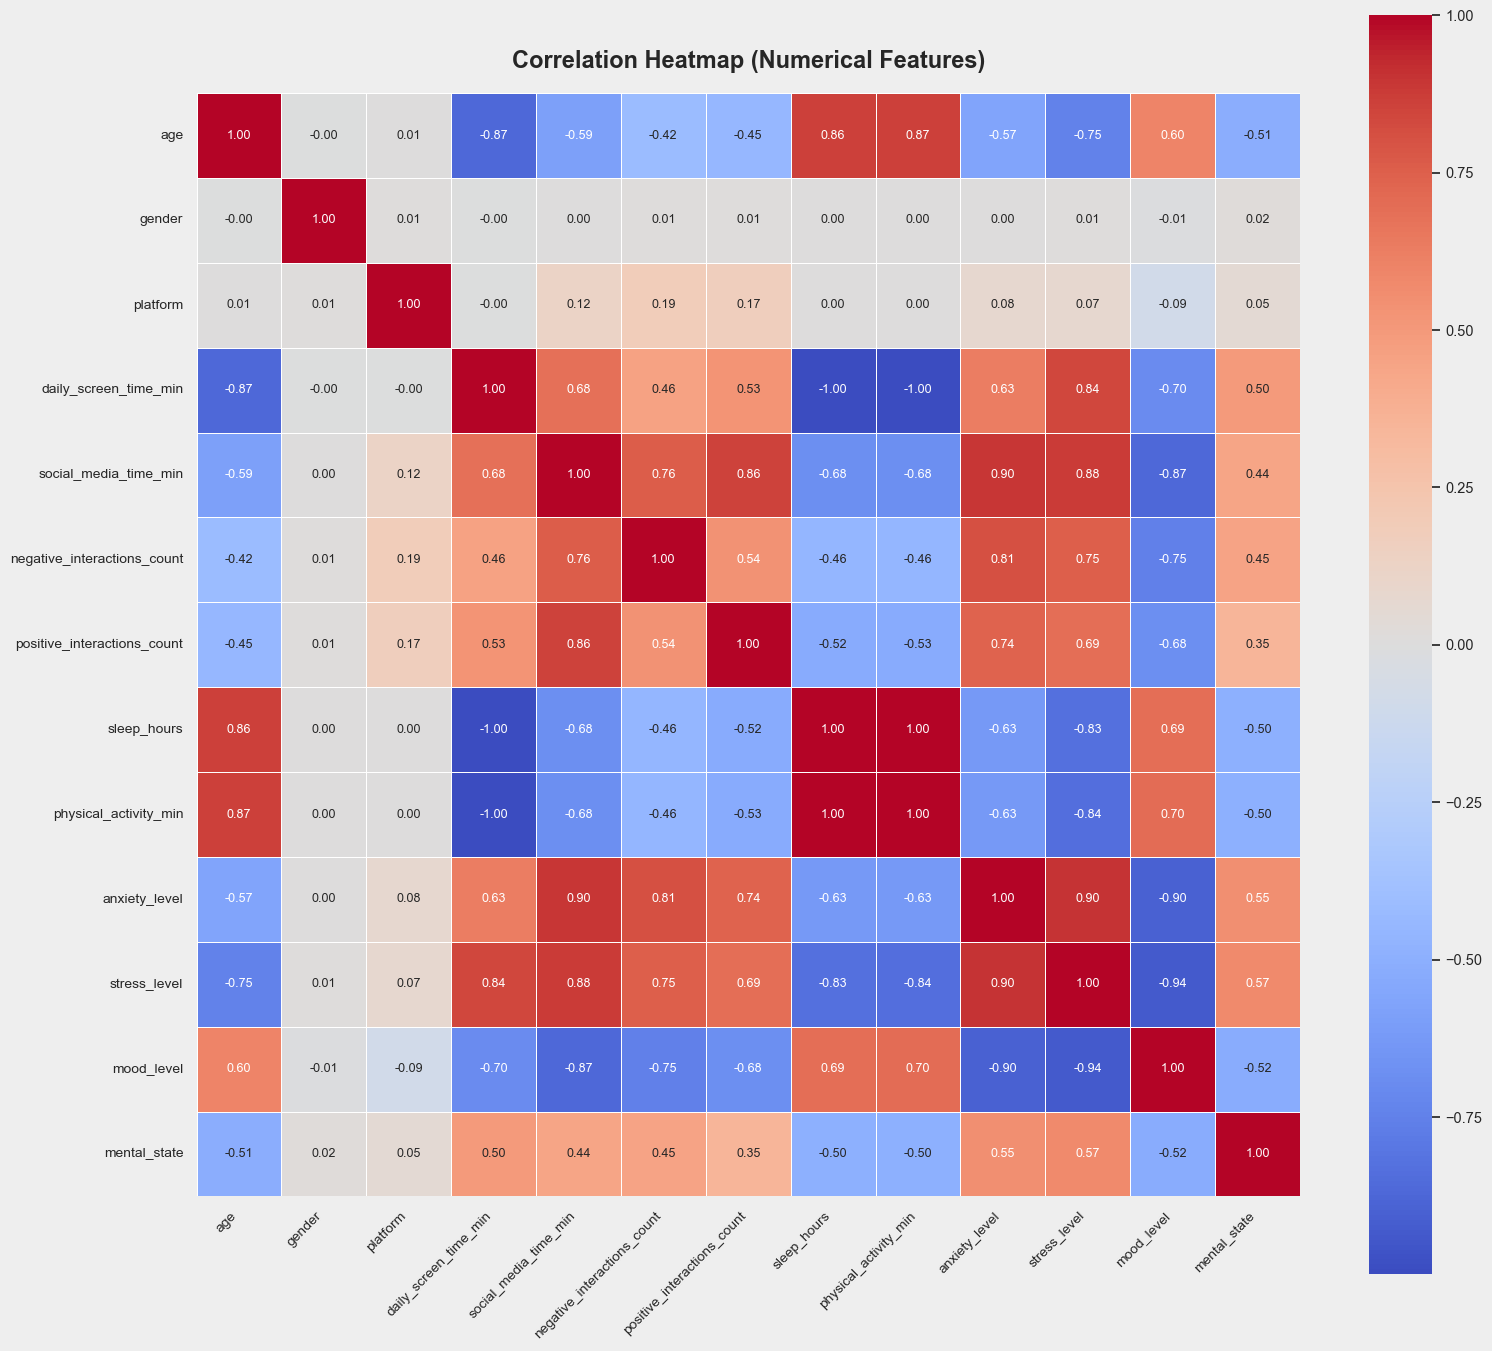

In [25]:


# =========================
# 1️⃣ General style
# =========================
sns.set_theme(style="white", font_scale=0.95)

# =========================
# 2️⃣ Select numerical columns only
# =========================
num_df = df.select_dtypes(include=np.number)

# Safety check
if num_df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for correlation heatmap.")

# =========================
# 3️⃣ Correlation matrix
# =========================
corr_matrix = num_df.corr()

# =========================
# 4️⃣ Plot
# =========================
plt.figure(figsize=(16, 14))

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.4,
    linecolor="white",
    square=True,                  
    annot_kws={"size": 9}       
)

# =========================
# 5️⃣ Styling
# =========================
ax.set_facecolor("#F5F5F5")
plt.gcf().patch.set_facecolor("#EEEEEE")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title(
    "Correlation Heatmap (Numerical Features)",
    fontsize=17,
    weight="bold",
    pad=18
)

plt.tight_layout()
plt.show()


In [26]:
target = 'mental_state'

df.corr(numeric_only=False)[target] \
  .abs() \
  .sort_values(ascending=False)
  ####################################################


mental_state                   1.000000
stress_level                   0.572768
anxiety_level                  0.548191
mood_level                     0.521991
age                            0.510644
daily_screen_time_min          0.499333
physical_activity_min          0.499289
sleep_hours                    0.498441
negative_interactions_count    0.448239
social_media_time_min          0.443416
positive_interactions_count    0.345442
platform                       0.054235
gender                         0.016751
Name: mental_state, dtype: float64

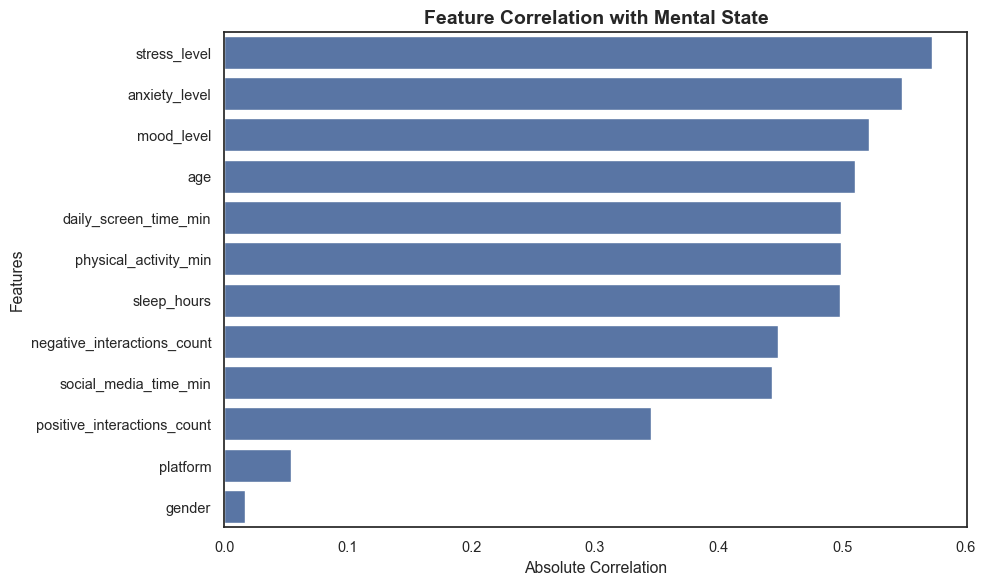

In [27]:
  
target = 'mental_state'

corr_target = (
    df.corr(numeric_only=True)[target]
    .abs()
    .sort_values(ascending=False)
    .drop(target)
)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=corr_target.values,
    y=corr_target.index
)

plt.title('Feature Correlation with Mental State', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

In [28]:

# correlation
corr_matrix = df.corr(numeric_only=True).abs()

# نجيب النصف العلوي بس (علشان منكررش)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# نطلع العلاقات القوية
strong_corr = (
    upper_triangle
    .stack()
    .reset_index()
)

strong_corr.columns = ['Feature_1', 'Feature_2', 'Correlation']

# فلترة العلاقات القوية
strong_corr = strong_corr[strong_corr['Correlation'] > 0.75]

strong_corr.sort_values(by='Correlation', ascending=False)


,Feature_1,Feature_2,Correlation
37,daily_screen_time_min,physical_activity_min,0.999627
36,daily_screen_time_min,sleep_hours,0.998554
63,sleep_hours,physical_activity_min,0.998059
75,stress_level,mood_level,0.935712
73,anxiety_level,mood_level,0.904181
72,anxiety_level,stress_level,0.900159
46,social_media_time_min,anxiety_level,0.896864
47,social_media_time_min,stress_level,0.882831
2,age,daily_screen_time_min,0.867422
48,social_media_time_min,mood_level,0.867241


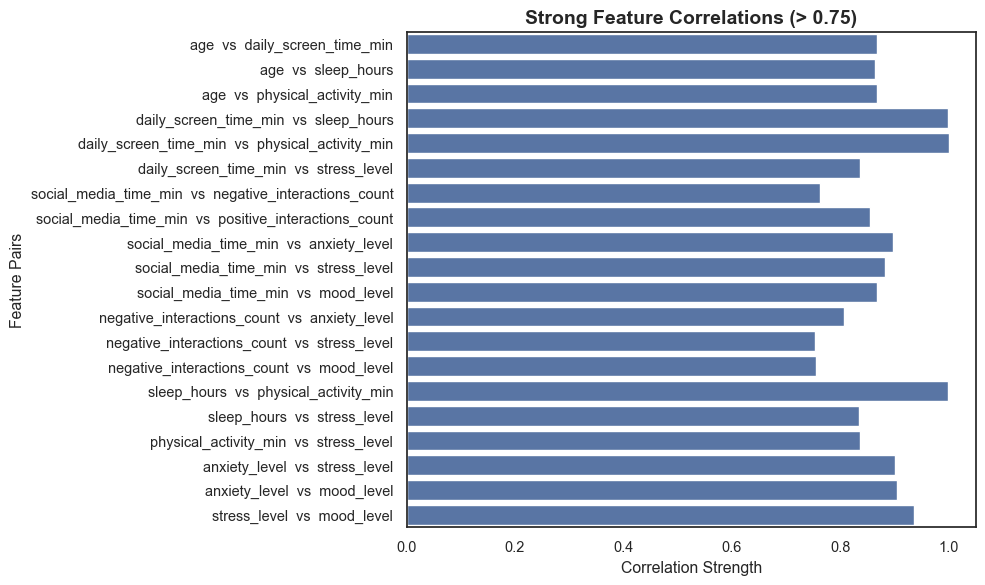

In [29]:


plt.figure(figsize=(10, 6))

sns.barplot(
    data=strong_corr,
    x='Correlation',
    y=strong_corr['Feature_1'] + '  vs  ' + strong_corr['Feature_2']
)

plt.title('Strong Feature Correlations (> 0.75)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Strength')
plt.ylabel('Feature Pairs')

plt.tight_layout()
plt.show()


# Unbalance cheching

C:\Users\HP\AppData\Local\Temp\ipykernel_1556\3522343230.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_1556\3522343230.py:2: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.



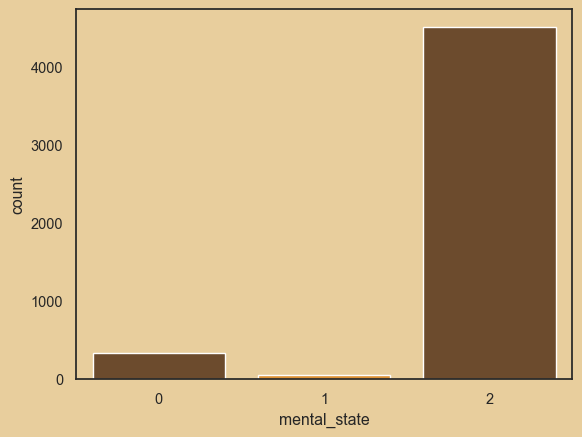

In [30]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='mental_state', ax=ax, palette=["#764a23","#f7941d"])
fig.patch.set_facecolor("#E8CE9D")
ax.set_facecolor("#E8CE9D")
plt.show()

# spliting_Data

In [31]:
x=df.drop(['mental_state'],axis=1)
y=df['mental_state']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,random_state=42,test_size=0.2)

# Unbalance Handling

In [33]:
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

c:\Users\HP\.android\Lib\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



In [34]:
counter=Counter(y_train)
print(counter)

Counter({2: 2898, 0: 2898, 1: 2898})


C:\Users\HP\AppData\Local\Temp\ipykernel_1556\129808123.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




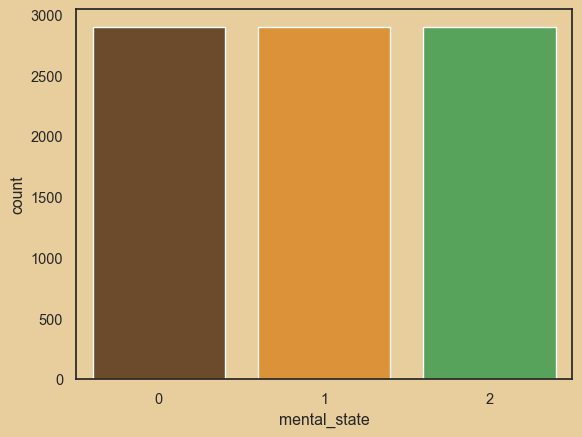

In [35]:
fig, ax = plt.subplots()

sns.countplot(
    x=y_train,
    ax=ax,
    palette=["#764a23", "#f7941d", "#4CAF50"]
)

fig.patch.set_facecolor("#E8CE9D")
ax.set_facecolor("#E8CE9D")

plt.show()


# Data Scaling

In [36]:
pt = PowerTransformer(method='yeo-johnson')
x_train = pt.fit_transform(x_train)
x_test = pt.transform(x_test)
x_valid= pt.transform(x_valid)

In [37]:
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

# Histogram Asfter preprocessing and Scaling

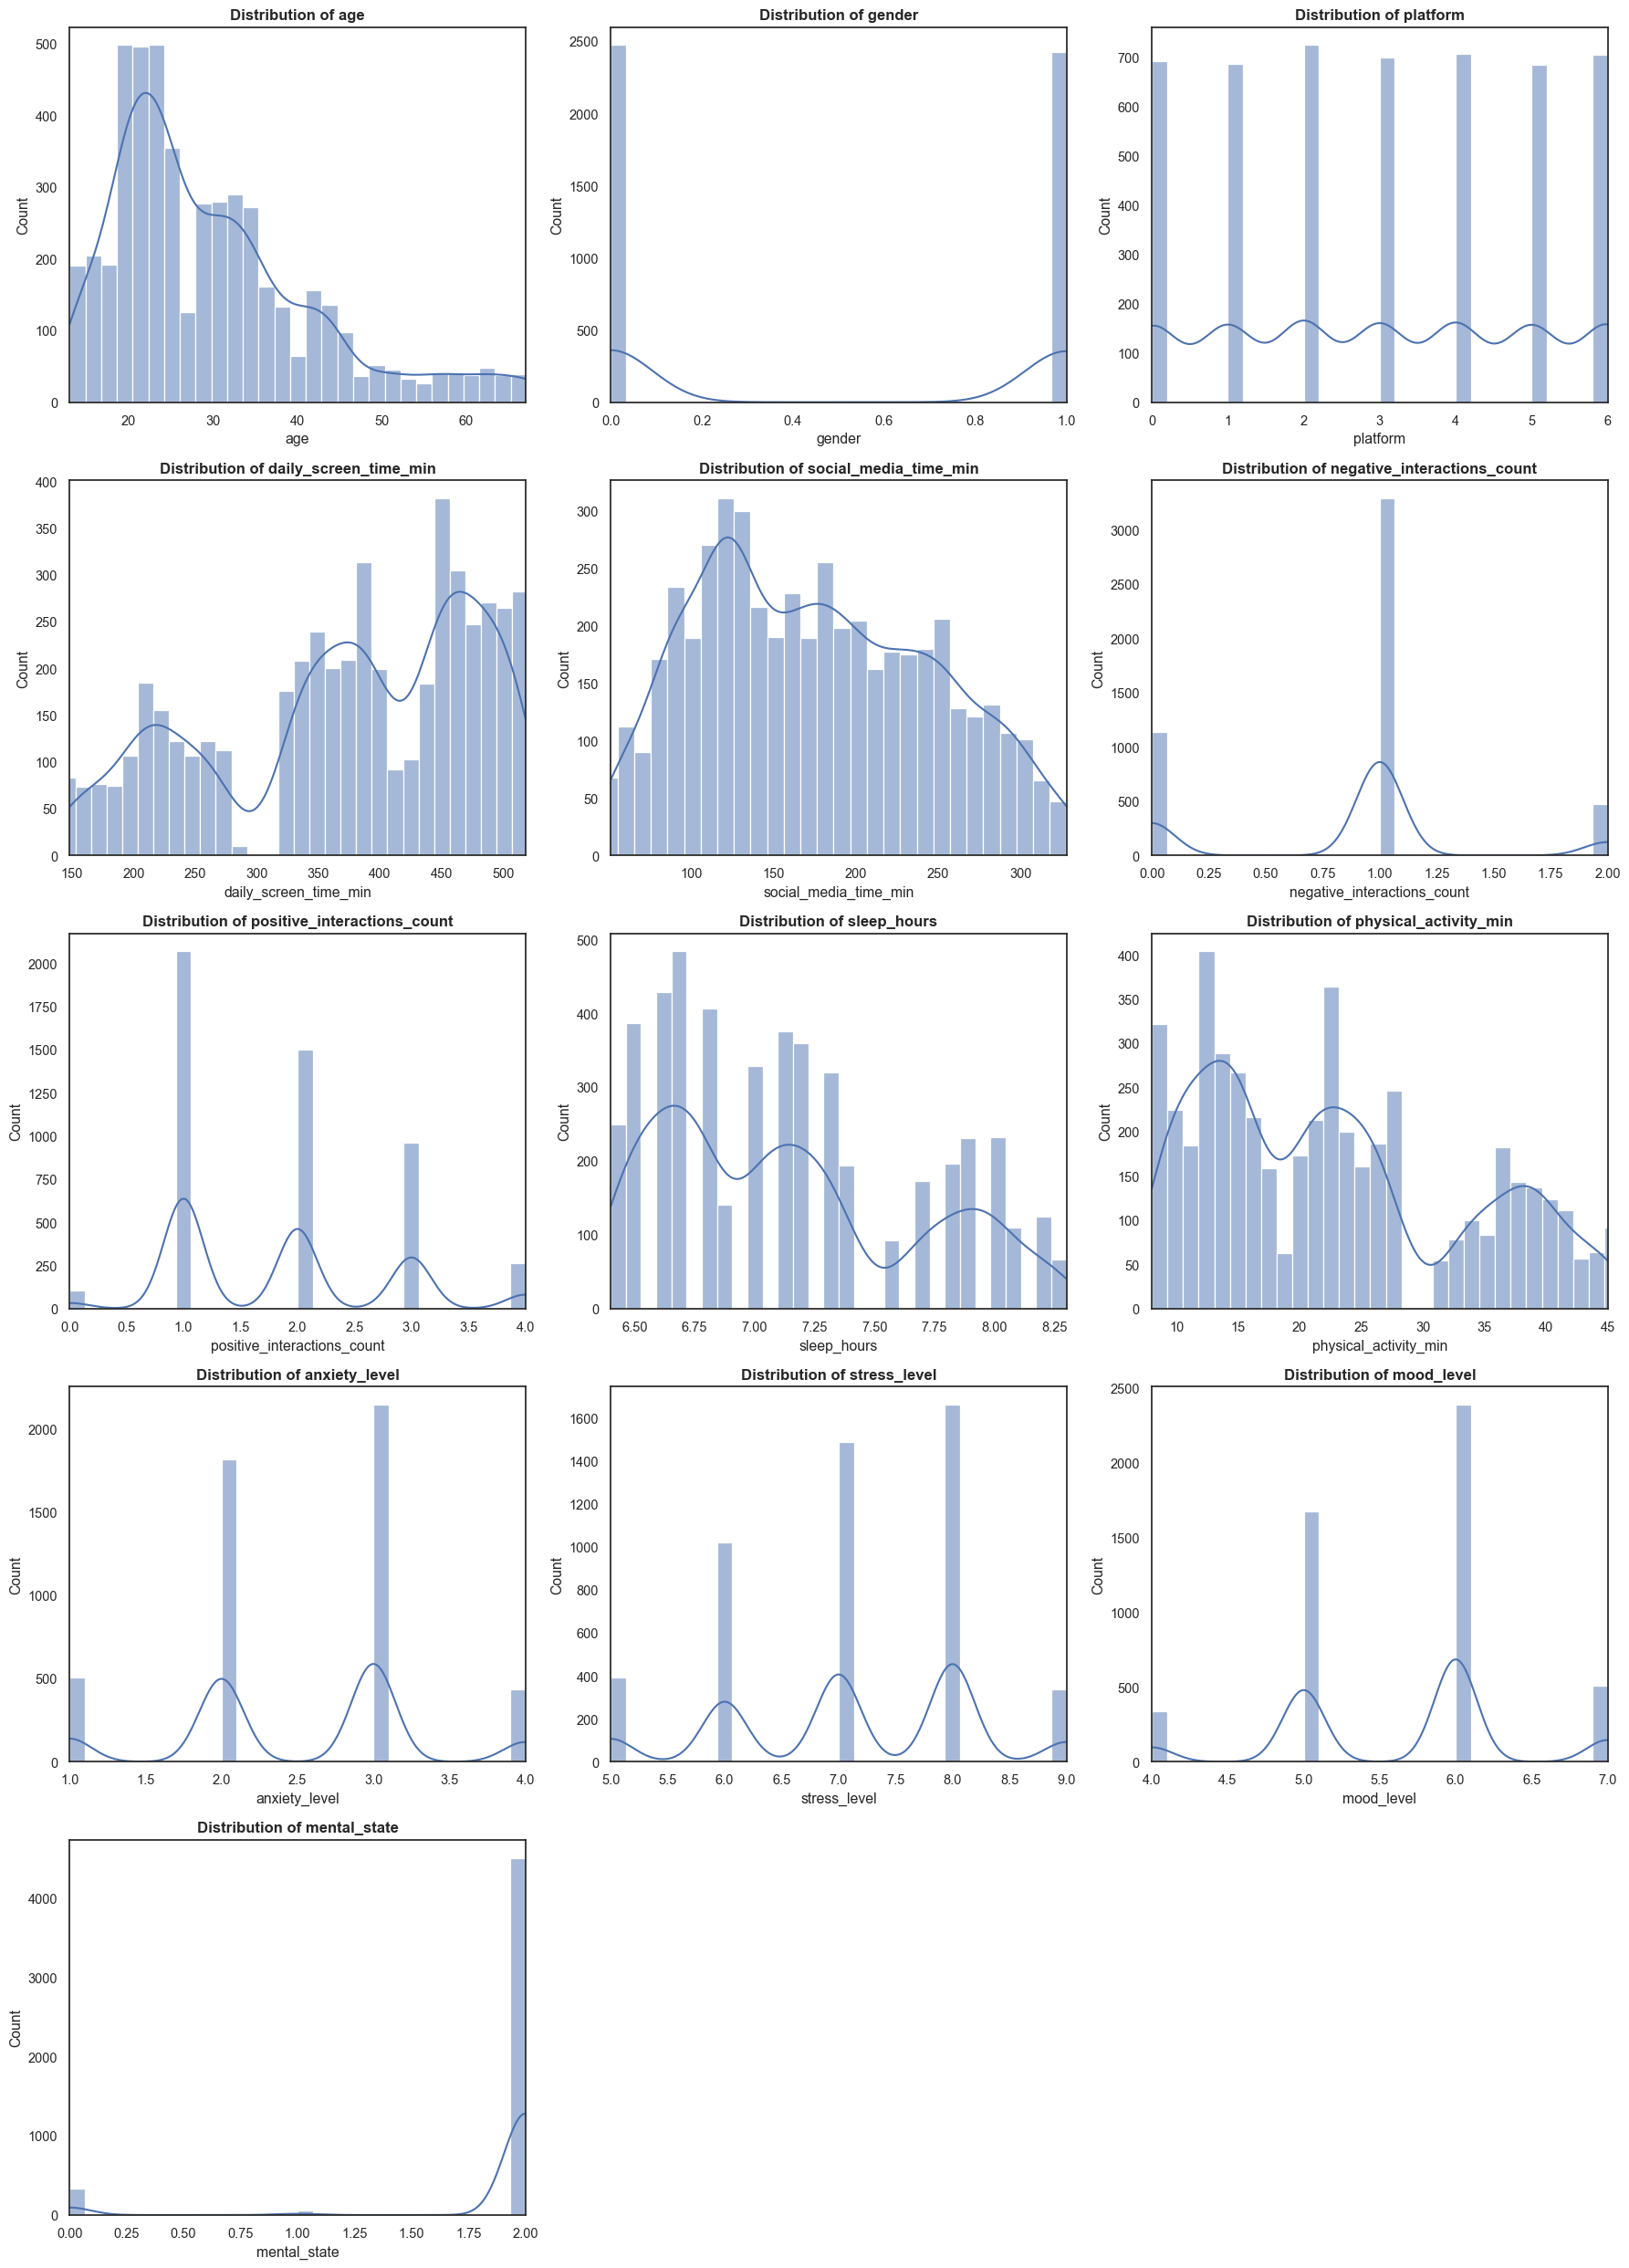

In [38]:


# اختيار الأعمدة الرقمية فقط
num_df = df.select_dtypes(include=np.number)

# عدد الأعمدة
n_cols = 3
n_rows = int(np.ceil(len(num_df.columns) / n_cols))

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(num_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(num_df[col], bins=30, kde=True)
    plt.xlim(num_df[col].quantile(0.01), num_df[col].quantile(0.99))

    
    plt.title(f"Distribution of {col}", fontsize=12, weight="bold")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

<div style="
    padding:14px;
    margin:12px 0;
    font-size:150%;
    color:#ffffff;
    border-radius:10px;
    background: linear-gradient(90deg, #00F260, #0575E6);
    box-shadow: 0 0 15px rgba(0,242,96,0.6);
    text-align:center;
    font-weight:600;
    letter-spacing:1px;">
   Models_ML
</div>


# Function For Check OverFitting

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report,roc_curve, roc_auc_score

def check_overfitting(model,x_train,y_train,x_vald,y_vald):
        y_tr_pred=model.predict(x_train)
        train_accuracy=accuracy_score(y_train,y_tr_pred)
        y_val_pred=model.predict(x_vald)
        valid_accuracy=accuracy_score(y_vald,y_val_pred)
        print("Model Metrics for CheckingOverfitting")
        print(f"Accuracy_ train {train_accuracy}")
        print(f"Accuracy_ validation {valid_accuracy}")

# 1-logistic Regression

In [40]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [41]:
check_overfitting(logistic,x_train,y_train,x_valid,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9926386013342535
Accuracy_ validation 0.9948979591836735


In [42]:
y_pred=logistic.predict(x_test)

In [43]:
logistc_accuracy=accuracy_score(y_test,y_pred)
logistc_accuracy

0.9979612640163099

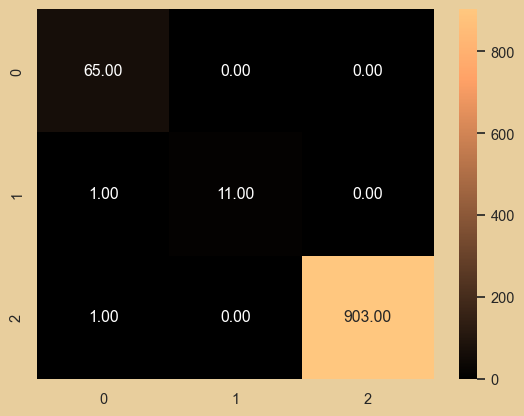

In [44]:
fig = plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f',cmap='copper')
fig.patch.set_facecolor('#E8CE9D')
ax = plt.gca()
ax.set_facecolor('#764a23')
plt.show()

In [45]:
pkl.dump(logistic,open('logistic.pkl',"wb"))

# 2-KNN

In [46]:
params={
    'n_neighbors':[3,5,7,9,11],
    'p':[1,2]
}
knn=KNeighborsClassifier()

grid=GridSearchCV(
    estimator=knn,
    param_grid=params,
    scoring='accuracy',
    cv=5
)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]},
             scoring='accuracy')

In [47]:
knn_model=grid.best_estimator_

In [48]:
check_overfitting(knn_model,x_train,y_train,x_valid,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9997699562916954
Accuracy_ validation 0.9961734693877551


In [49]:
y_pred=knn_model.predict(x_test)
knn_accuracy=accuracy_score(y_test,y_pred)
knn_accuracy

0.9979612640163099

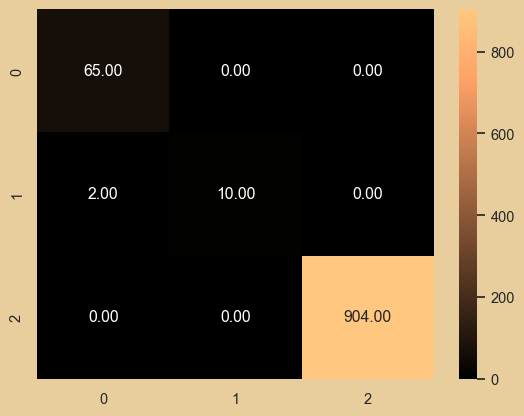

In [50]:
fig = plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f',cmap='copper')
fig.patch.set_facecolor('#E8CE9D')
ax = plt.gca()
ax.set_facecolor('#764a23')
plt.show()

In [51]:
pkl.dump(knn_model,open('knn.pkl',"wb"))

# 3-Decision Tree

In [52]:
params={'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10],
    'ccp_alpha':[.001,.002,.003,.004]}
tree=DecisionTreeClassifier()
grid=GridSearchCV(estimator=tree,param_grid=params,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.002, 0.003, 0.004],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [53]:
decision_model=grid.best_estimator_
check_overfitting(decision_model,x_train,y_train,x_valid,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 1.0
Accuracy_ validation 1.0


In [54]:
y_pred=decision_model.predict(x_test)
tree_accuracy=accuracy_score(y_test,y_pred)
tree_accuracy

1.0

In [55]:
pkl.dump(decision_model,open('decision_tree.pkl',"wb"))

# 4-Naive Bayes

In [56]:
classsifier=GaussianNB()
classsifier.fit(x_train,y_train)

GaussianNB()

In [57]:
check_overfitting(classsifier,x_train,y_train,x_valid,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.966183574879227
Accuracy_ validation 0.9936224489795918


In [58]:
y_pred=classsifier.predict(x_test)
naive_accuracy=accuracy_score(y_test,y_pred)
naive_accuracy

0.9979612640163099

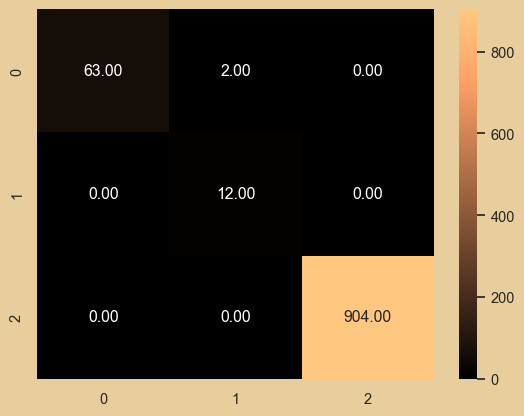

In [59]:
fig = plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f',cmap='copper')
fig.patch.set_facecolor('#E8CE9D')
ax = plt.gca()
ax.set_facecolor('#764a23')
plt.show()

In [60]:
pkl.dump(classsifier,open('naive_bayes.pkl',"wb"))

In [61]:
svm=SVC(C=1, gamma='scale',kernel='rbf')
svm.fit(x_train,y_train)
check_overfitting(svm,x_train,y_train,x_valid,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9914883827927307
Accuracy_ validation 0.9948979591836735


In [62]:
y_pred=svm.predict(x_test)
svm_accuracy=accuracy_score(y_test,y_pred)

In [63]:
confusion_matrix(y_test,y_pred)

array([[ 65,   0,   0],
       [  1,  11,   0],
       [  0,   0, 904]], dtype=int64)

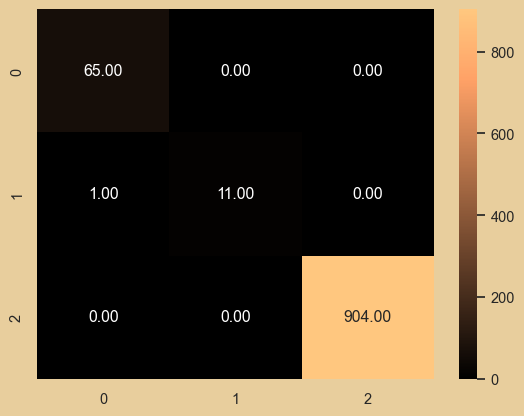

In [64]:
fig = plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f',cmap='copper')
fig.patch.set_facecolor('#E8CE9D')
ax = plt.gca()
ax.set_facecolor('#764a23')
plt.show()

In [65]:
pkl.dump(svm,open('svm.pkl',"wb"))

# Compare

<Axes: >

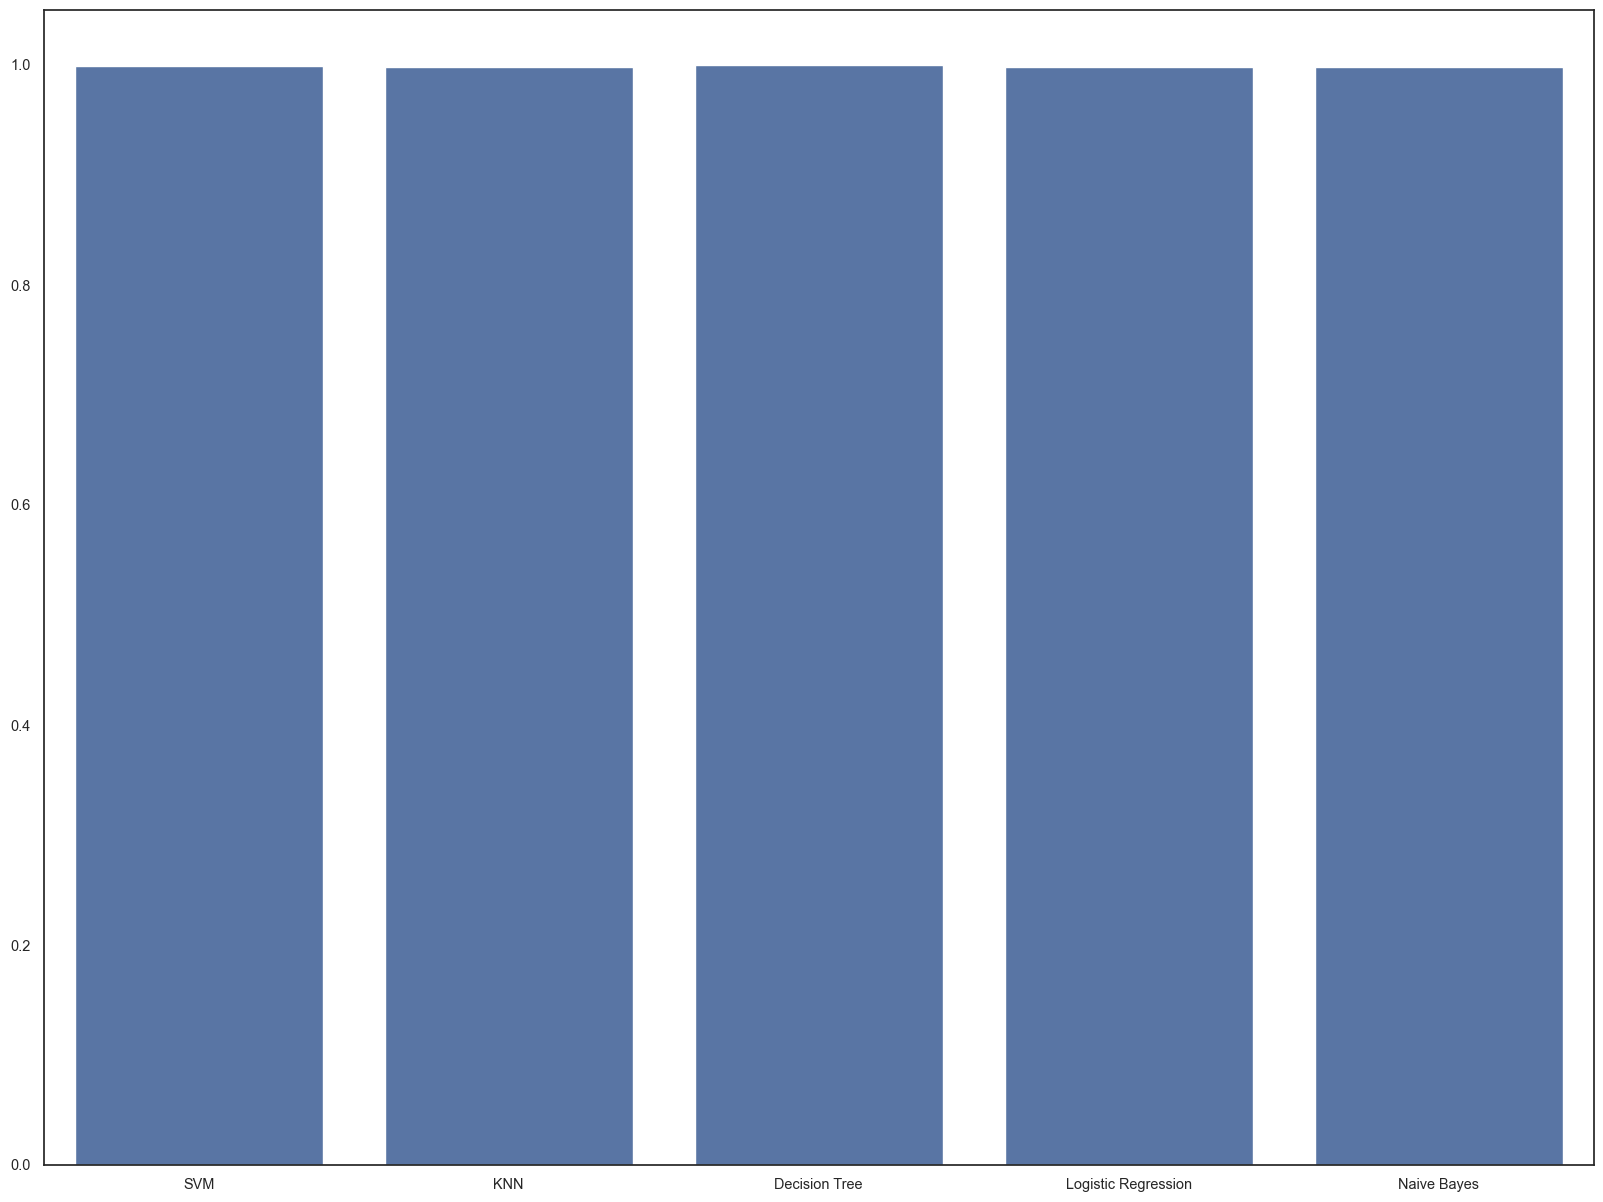

In [66]:
plt.figure(figsize=(20,15))
metrics = ['SVM', 'KNN',  'Decision Tree', 'Logistic Regression','Naive Bayes']
accuracy = [svm_accuracy,knn_accuracy,tree_accuracy,logistc_accuracy,naive_accuracy,]
sns.barplot(x=metrics, y=accuracy)

In [67]:
pkl.dump(pt, open("power_transformer.pkl", "wb"))
pkl.dump(scaler, open("robust_scaler.pkl", "wb"))
